# Satellite Signal Emulator
#### This signal generator mimics the raw signal coming from a GPS satellite

## Imports and definitions
#### The book defines some parameters, here they are initialized as variables, but they may not be used yet.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Some definitions and initialization of variables

# GPS fundamental frequency = 10.23MHz
f0 = 10.23 *10**6
# L1 carrier frequency is 154 * the fundamental GPS frequency
fL1 = 154*f0 #Hz
wL1 = 2*np.pi*fL1 #rad - omegaL1
# Doppler shift
doppler = 0 #Hz
# Sampling frequency MUST BE 38.192MHz per Borre pg77
sampFreq = 38.192 *10**6
# Frequency step gives resolution bandwidth for the search range of +-10kHz, per Borre pg26
freqStep = 20 #Hz

## Generation of the signals

In [65]:
# Time vector for generating signals
tLength = 0.001 # units = sec - must have length of 1ms per Borre pg77
N = 38192 # Number of samples over 1ms at 38.192MHz sampling frequency
t = np.linspace(0, tLength, N) # array of samples
theta = 0 # Argument to the complex sinusoids below

# L1 continuous wave generation
IL1 = []
QL1 = []

for i in t:
    # I and Q are the in-phase and quadrature components of the L1 GPS signal, respectively ***samples/N = t***
    # Take a sample
    Isample = np.cos(theta + doppler) + 1j*np.sin(theta + doppler)
    Qsample = np.sin(theta + doppler) + 1j*np.cos(theta + doppler)    
    
    # Append samples to the end of the IL1 and QL1 arays
    IL1.append(Isample)
    QL1.append(Qsample)
    # Increment the complex sinusoid argument by omegaL1 
    theta += wL1
    
# Display the radian and frequency values    
print("wL1 = %d radians/sec" %wL1)
print("fL1 = %d Hz" %fL1)


wL1 = 9898655796 radians/sec
fL1 = 1575420000 Hz


## Plotting
#### I do not understand the phase and frequency changes that are shown in the plot. I also do not understand the fact that the plot seems to show a frequency much smaller than the argument to the complex sinusoids.

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


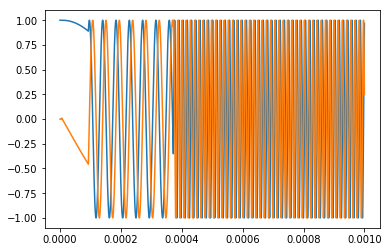

In [66]:
tStart = 1
tStop = N
plt.plot(t[tStart:tStop], IL1[tStart:tStop])
plt.plot(t[tStart:tStop], QL1[tStart:tStop])
plt.show()